In [1]:
from pyod.utils.data import generate_data
from pyod.models.ocsvm import OneClassSVM
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pyod.models.deep_svdd import DeepSVDD
from scipy.io import loadmat
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score

In [2]:
X_train, X_test, y_train, y_test = generate_data(
    n_train=300,
    n_test=200,
    n_features=3,
    contamination=0.15,
    random_state=42
)

In [3]:
y_train

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## Ex1

### OCSVM - Linear Kernel

In [4]:
clf_svm = OneClassSVM(kernel='linear' , nu = 0.15)
clf_svm.fit(X_train)

y_test_pred = clf_svm.predict(X_test) 
y_train_pred = clf_svm.predict(X_train)

y_test_pred = (-y_test_pred + 1) // 2
y_train_pred = (-y_train_pred + 1) // 2 

balanced_acc = balanced_accuracy_score(y_test, y_test_pred)

y_test_scores = clf_svm.decision_function(X_test)
roc_auc = roc_auc_score(y_test, y_test_scores)

print(f"Balanced Accuracy: {balanced_acc}")
print(f"ROC AUC: {roc_auc}")

Balanced Accuracy: 0.9833333333333334
ROC AUC: 0.01215686274509804


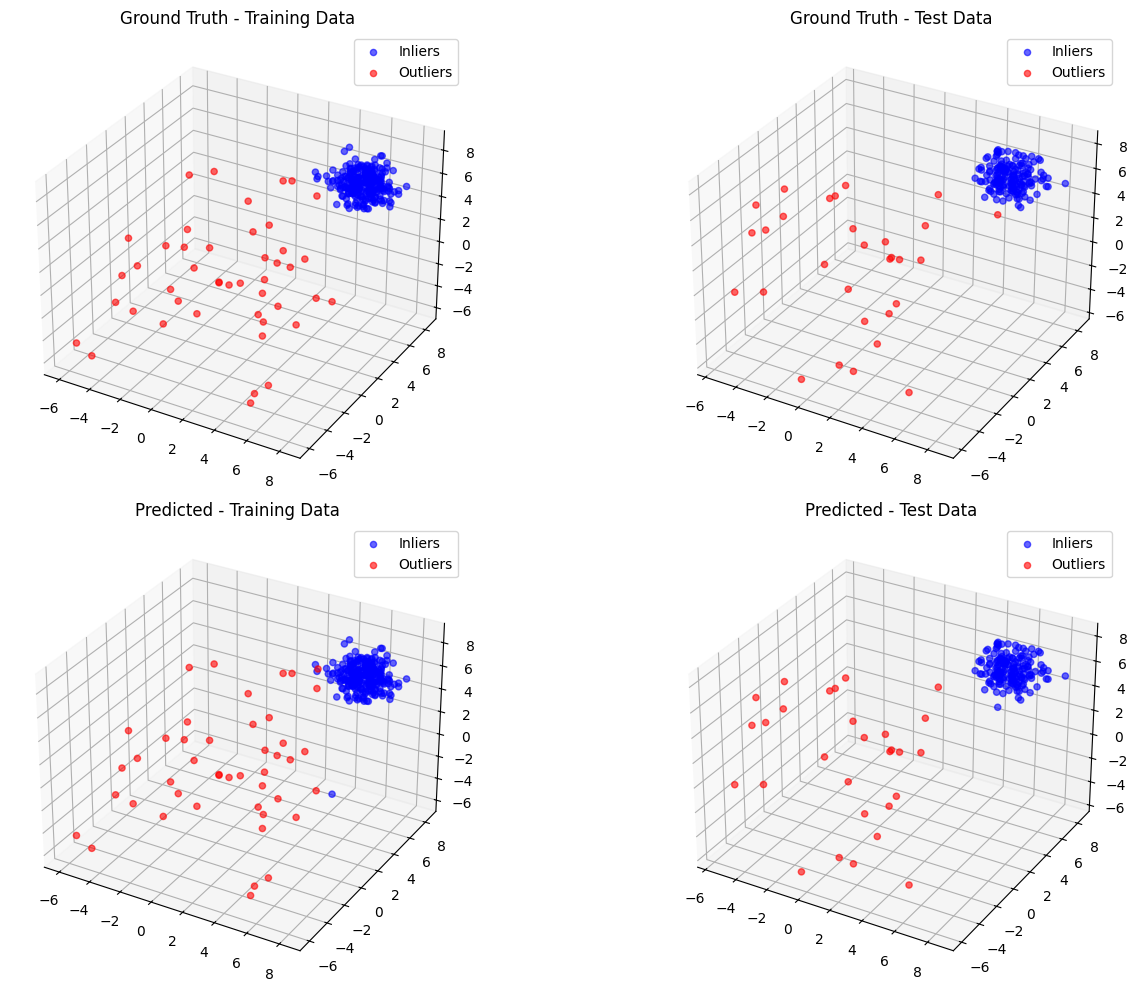

In [5]:
def plot_3d_data(ax, data, labels, title, colors=['blue', 'red']):
    inliers = data[labels == 0]
    outliers = data[labels == 1]
    ax.scatter(inliers[:, 0], inliers[:, 1], inliers[:, 2], c=colors[0], label="Inliers", alpha=0.6)
    ax.scatter(outliers[:, 0], outliers[:, 1], outliers[:, 2], c=colors[1], label="Outliers", alpha=0.6)
    ax.set_title(title)
    ax.legend()

fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(221, projection='3d')
plot_3d_data(ax1, X_train, y_train, "Ground Truth - Training Data")

ax2 = fig.add_subplot(222, projection='3d')
plot_3d_data(ax2, X_test, y_test, "Ground Truth - Test Data")

ax3 = fig.add_subplot(223, projection='3d')
plot_3d_data(ax3, X_train, y_train_pred, "Predicted - Training Data")

ax4 = fig.add_subplot(224, projection='3d')
plot_3d_data(ax4, X_test, y_test_pred, "Predicted - Test Data")

plt.tight_layout()
plt.show()


### OCSVM - RBF Kernel

In [6]:
clf_svm = OneClassSVM(kernel='rbf', nu = 0.15)
clf_svm.fit(X_train)

y_test_pred = clf_svm.predict(X_test) 
y_train_pred = clf_svm.predict(X_train)

# y_test_pred = (-y_test_pred + 1) // 2
# y_train_pred = (-y_train_pred + 1) // 2

balanced_acc = balanced_accuracy_score(y_test, y_test_pred)

y_test_scores = clf_svm.decision_function(X_test)
roc_auc = roc_auc_score(y_test, y_test_scores)

print(f"Balanced Accuracy: {balanced_acc}")
print(f"ROC AUC: {roc_auc}")

Balanced Accuracy: 0.06666666666666667
ROC AUC: 0.007254901960784306


c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


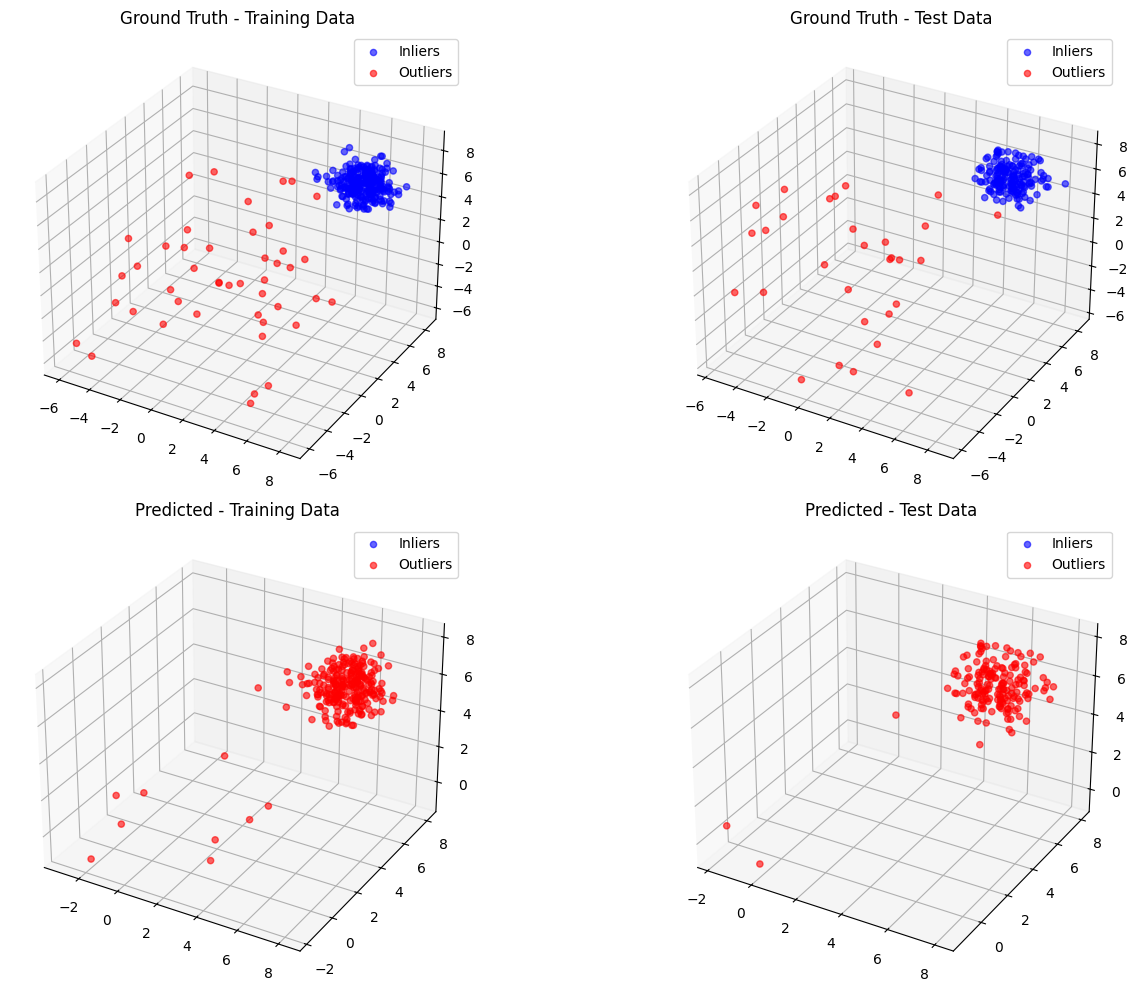

In [7]:
def plot_3d_data(ax, data, labels, title, colors=['blue', 'red']):
    inliers = data[labels == 0]
    outliers = data[labels == 1]
    ax.scatter(inliers[:, 0], inliers[:, 1], inliers[:, 2], c=colors[0], label="Inliers", alpha=0.6)
    ax.scatter(outliers[:, 0], outliers[:, 1], outliers[:, 2], c=colors[1], label="Outliers", alpha=0.6)
    ax.set_title(title)
    ax.legend()

fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(221, projection='3d')
plot_3d_data(ax1, X_train, y_train, "Ground Truth - Training Data")

ax2 = fig.add_subplot(222, projection='3d')
plot_3d_data(ax2, X_test, y_test, "Ground Truth - Test Data")

ax3 = fig.add_subplot(223, projection='3d')
plot_3d_data(ax3, X_train, y_train_pred, "Predicted - Training Data")

ax4 = fig.add_subplot(224, projection='3d')
plot_3d_data(ax4, X_test, y_test_pred, "Predicted - Test Data")

plt.tight_layout()
plt.show()

### DeepSVDD

In [8]:
clf_deepsvdd = DeepSVDD(
    n_features = 3, 
    hidden_neurons=[32, 16],  
    epochs=30, 
    contamination=0.15  
)
clf_deepsvdd.fit(X_train)

y_test_pred = clf_deepsvdd.predict(X_test) 
y_train_pred = clf_deepsvdd.predict(X_train)


Epoch 1/30, Loss: 2.304783195257187
Epoch 2/30, Loss: 2.211030751466751
Epoch 3/30, Loss: 2.291176661849022
Epoch 4/30, Loss: 2.1703296825289726
Epoch 5/30, Loss: 2.1847157180309296
Epoch 6/30, Loss: 2.3282393366098404
Epoch 7/30, Loss: 2.1619941145181656
Epoch 8/30, Loss: 2.2119589149951935
Epoch 9/30, Loss: 2.2880816757678986
Epoch 10/30, Loss: 2.1278710290789604
Epoch 11/30, Loss: 2.121834807097912
Epoch 12/30, Loss: 2.181072920560837
Epoch 13/30, Loss: 2.3310092985630035
Epoch 14/30, Loss: 2.2470571622252464
Epoch 15/30, Loss: 2.1478054746985435
Epoch 16/30, Loss: 2.3871363773941994
Epoch 17/30, Loss: 2.285292848944664
Epoch 18/30, Loss: 2.3002827167510986
Epoch 19/30, Loss: 2.1424414813518524
Epoch 20/30, Loss: 2.1761108115315437
Epoch 21/30, Loss: 2.2518988624215126
Epoch 22/30, Loss: 2.1478575840592384
Epoch 23/30, Loss: 2.129981815814972
Epoch 24/30, Loss: 2.2320431768894196
Epoch 25/30, Loss: 2.1642375588417053
Epoch 26/30, Loss: 2.3817632272839546
Epoch 27/30, Loss: 2.1662250

In [9]:
balanced_acc = balanced_accuracy_score(y_test, y_test_pred)

y_test_scores = clf_deepsvdd.decision_function(X_test)
roc_auc = roc_auc_score(y_test, y_test_scores)

print(f"Balanced Accuracy: {balanced_acc}")
print(f"ROC AUC: {roc_auc}")

Balanced Accuracy: 0.9098039215686274
ROC AUC: 0.9425490196078432


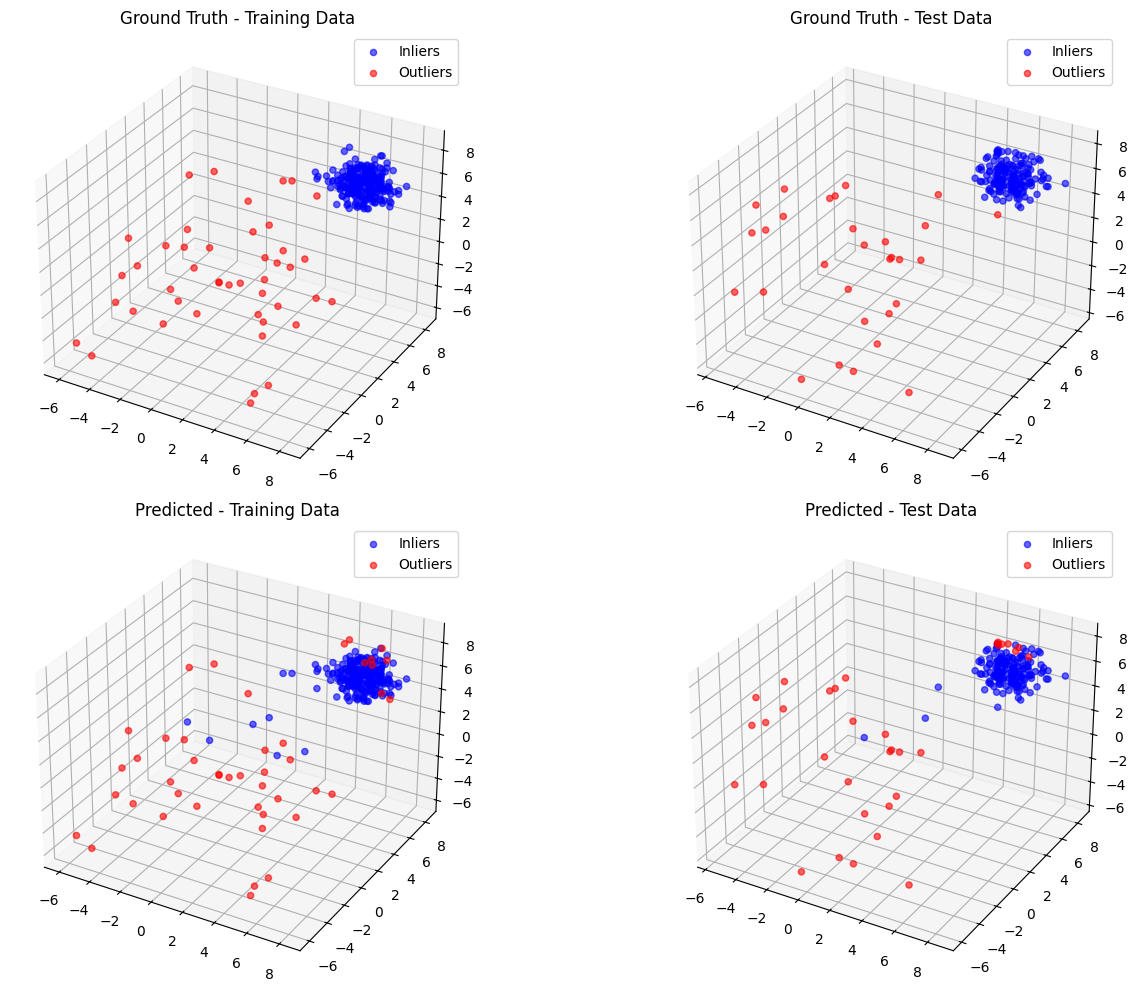

In [10]:
def plot_3d_data(ax, data, labels, title, colors=['blue', 'red']):
    inliers = data[labels == 0]
    outliers = data[labels == 1]
    ax.scatter(inliers[:, 0], inliers[:, 1], inliers[:, 2], c=colors[0], label="Inliers", alpha=0.6)
    ax.scatter(outliers[:, 0], outliers[:, 1], outliers[:, 2], c=colors[1], label="Outliers", alpha=0.6)
    ax.set_title(title)
    ax.legend()

fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(221, projection='3d')
plot_3d_data(ax1, X_train, y_train, "Ground Truth - Training Data")

ax2 = fig.add_subplot(222, projection='3d')
plot_3d_data(ax2, X_test, y_test, "Ground Truth - Test Data")

ax3 = fig.add_subplot(223, projection='3d')
plot_3d_data(ax3, X_train, y_train_pred, "Predicted - Training Data")

ax4 = fig.add_subplot(224, projection='3d')
plot_3d_data(ax4, X_test, y_test_pred, "Predicted - Test Data")

plt.tight_layout()
plt.show()

## Ex2

In [11]:
from sklearn.svm import OneClassSVM

In [12]:
data = loadmat('cardio.mat')

X = data['X']
y = data['y'].ravel()

y = -(2 * y) + 1

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.6, random_state=42)

param_grid = {
    'oneclasssvm__kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'oneclasssvm__gamma': ['scale', 'auto'],
    'oneclasssvm__nu': [0.1, 0.25, 0.5, 0.75]
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('oneclasssvm', OneClassSVM())
])

grid_search = GridSearchCV(pipeline, param_grid, scoring='balanced_accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f'Best parameters: {best_params}')
print(f'Balanced accuracy: {balanced_acc}')

Best parameters: {'oneclasssvm__gamma': 'scale', 'oneclasssvm__kernel': 'rbf', 'oneclasssvm__nu': 0.25}
Balanced accuracy: 0.838857750289911


## Ex3

In [14]:
from pyod.models.ocsvm import OneClassSVM as PyOD_OCSVM

In [15]:
data = loadmat('shuttle.mat')

X = data['X']
y = data['y'].ravel()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
ocsvm = PyOD_OCSVM(kernel='rbf')
ocsvm.fit(X_train)

y_pred_oc = ocsvm.predict(X_test)
scores_oc = ocsvm.decision_function(X_test)

ba_oc = balanced_accuracy_score(y_test, y_pred_oc)
roc_oc = roc_auc_score(y_test, scores_oc)

print("Balanced Accuracy:", ba_oc)
print("ROC AUC:", roc_oc)

Balanced Accuracy: 0.003416856492027335
ROC AUC: 0.008600055745844534


c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [18]:
deep_svdd = DeepSVDD(n_features=X_train.shape[1], epochs=30, hidden_neurons=[32, 16])
deep_svdd.fit(X_train)

y_pred_svdd = deep_svdd.predict(X_test)
scores_svdd = deep_svdd.decision_function(X_test)

ba_svdd = balanced_accuracy_score(y_test, y_pred_svdd)
roc_svdd = roc_auc_score(y_test, scores_svdd)

print("Balanced Accuracy:", ba_svdd)
print("ROC AUC:", roc_svdd)

Epoch 1/30, Loss: 323.9864567518234
Epoch 2/30, Loss: 324.7080735974014
Epoch 3/30, Loss: 324.9419249817729
Epoch 4/30, Loss: 324.0339675247669
Epoch 5/30, Loss: 323.97980354726315
Epoch 6/30, Loss: 323.947872299701
Epoch 7/30, Loss: 323.9982410669327
Epoch 8/30, Loss: 323.9675411619246
Epoch 9/30, Loss: 324.00640849396586
Epoch 10/30, Loss: 323.99480294436216
Epoch 11/30, Loss: 323.986399538815
Epoch 12/30, Loss: 324.3565064445138
Epoch 13/30, Loss: 324.5331664979458
Epoch 14/30, Loss: 323.98245825618505
Epoch 15/30, Loss: 323.983255520463
Epoch 16/30, Loss: 324.1716115102172
Epoch 17/30, Loss: 325.31645952910185
Epoch 18/30, Loss: 323.9674078896642
Epoch 19/30, Loss: 323.9643725976348
Epoch 20/30, Loss: 324.0272204875946
Epoch 21/30, Loss: 325.15437722951174
Epoch 22/30, Loss: 323.97474540024996
Epoch 23/30, Loss: 324.67440494149923
Epoch 24/30, Loss: 324.00956612825394
Epoch 25/30, Loss: 324.3203689754009
Epoch 26/30, Loss: 323.94858392700553
Epoch 27/30, Loss: 324.0266074538231
Epo

In [25]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [27]:
architectures = [
    [32, 16],
    [32, 32],
    [64, 64]
]

results = {}

for arch in architectures:
    model = DeepSVDD(n_features=X_train.shape[1], epochs=30, hidden_neurons=arch)
    model.fit(X_train, )

    y_pred_arch = model.predict(X_test)
    scores_arch = model.decision_function(X_test)

    ba = balanced_accuracy_score(y_test, y_pred_arch)
    roc = roc_auc_score(y_test, scores_arch)

    results[str(arch)] = {
        'BA': ba,
        'ROC_AUC': roc
    }

Epoch 1/30, Loss: 330.4017443433404
Epoch 2/30, Loss: 330.2530280351639
Epoch 3/30, Loss: 330.1704714819789
Epoch 4/30, Loss: 329.98049169033766
Epoch 5/30, Loss: 330.01511154323816
Epoch 6/30, Loss: 329.95080037787557
Epoch 7/30, Loss: 330.4332020059228
Epoch 8/30, Loss: 330.7833142206073
Epoch 9/30, Loss: 329.9956313073635
Epoch 10/30, Loss: 330.00406231731176
Epoch 11/30, Loss: 330.6398604735732
Epoch 12/30, Loss: 330.7674779519439
Epoch 13/30, Loss: 329.94592816382647
Epoch 14/30, Loss: 330.10611110180616
Epoch 15/30, Loss: 330.11192083358765
Epoch 16/30, Loss: 358.4039617329836
Epoch 17/30, Loss: 330.08839739486575
Epoch 18/30, Loss: 329.95396145805717
Epoch 19/30, Loss: 329.9907264560461
Epoch 20/30, Loss: 330.56671407073736
Epoch 21/30, Loss: 330.0875045582652
Epoch 22/30, Loss: 329.99972765892744
Epoch 23/30, Loss: 329.9672675989568
Epoch 24/30, Loss: 330.148350648582
Epoch 25/30, Loss: 330.02639996260405
Epoch 26/30, Loss: 330.00299720466137
Epoch 27/30, Loss: 330.215839132666

In [28]:
for arch, metrics in results.items():
    print(f"Architecture {arch}")
    print(f"Balanced Accuracy: {metrics['BA']:.4f}")
    print(f"ROC AUC: {metrics['ROC_AUC']:.4f}\n")

Architecture [32, 16]
Balanced Accuracy: 0.9608
ROC AUC: 0.9857

Architecture [32, 32]
Balanced Accuracy: 0.8852
ROC AUC: 0.9742

Architecture [64, 64]
Balanced Accuracy: 0.9675
ROC AUC: 0.9910

